# Predicting Future Retail Performance Based on Location and Sale Variables (discounts & assortments)

# Background

Modern furniture retailer with 70 brick and mortar stores along with direct (web & phone) business

$170 million in annual sales – with a dataset that includes 8 quarters of of transactions with approximately 60k observations per quarter

The Problem: Based on the dataset, what trigger events can be identified that will lead to increased performance throughout the chain? More specifically, how does prevalence of discounts effect profitability?

Conclusions from these predictions can help steer corporate strategy, company messaging / marketing and store sales priorities

# Dataset

The dataset is actual data for the fiscal years 2007 and 2008
Approximately 60k observations per quarter
Observations are broken down to unique ItemCode / SKUCode (can include multiple units of same SKU).

Features for the dataset include:

ShipDate (date the order left DC)

OrderNumber (can apply to multiple products / lines)

ItemCode, ItemDescription, SKUCode (unique product description) 

OrderLocation (which store or web / phone)

Department (which buying group is responsible for the ItemDescription)

UnitsSold, TotalNetRevenue, TotalCOGS (sales & profit data)

    
CurrentRetailPriceEach (can determined discounting)





# Do stores that discount more aggressively than stores under the same brand perform better?

Discounting is a way to attract immediate sales / volume at the expense of profits. Discounts when strategically applied can improve a store’s performance (both top and bottom line) as compared to stores that do not discount as often. 

Although there are numerous chainwide discounts, managers have discretion to offer discounts to customers in order to close at risk sales and to address customer service issues. 


# Potential Methods and Models


*** Logistical regression ***

-> Does a store discount greater or less than the mean of the fleet?
     (greater / less)
     
-> Does a store perform better on a comp sales bases or worse than the mean of the fleet?
    (better / worse)
    
-> Is the store more or less profitable than the mean of the fleet?
    (more / less)

*** Linear regression***

What correlations can be found among the entire fleet:

-> same store comp% 
    
-> store discount rate%

-> % of assortment from the classics collection

-> Total volume ($s)

-> Gross margin% 

# Outstanding Questions, Assumptions, Risks and Cavaets

Location of stores

Externalities (housing bubble burst)

Need to group data appropriately for comp purposes 

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import feature_selection, linear_model

import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('/Users/samuelleichman/DS-SF-30/unit-project/dataset/DWRMaster.csv')

In [3]:
df

,ShipDate,OrderNumber,ItemCode,ItemDescription,OrderLocation,...,OrderMonth,Discount,DR,Full_Path_Sales,MarketClass
0,1/4/2007 12:00:00 AM,G0793000,10027-CRYSTAL,"Crystal-Marquise-Desktop-Globe,-Crystal",227-BrooklynHeightsStudio,...,Jan07,-0.005,-0.00003,168.00,Top5
1,1/10/2007 12:00:00 AM,G0797733,10027-CRYSTAL,"Crystal-Marquise-Desktop-Globe,-Crystal",218-DallasStudio,...,Jan07,-127.680,0.00000,168.00,Major
2,1/11/2007 12:00:00 AM,G0798198,10027-CRYSTAL,"Crystal-Marquise-Desktop-Globe,-Crystal",228-CambridgeStudio,...,Jan07,-77.952,0.00000,168.00,Major
3,1/23/2007 12:00:00 AM,G0791027,10027-CRYSTAL,"Crystal-Marquise-Desktop-Globe,-Crystal",271-PotreroStudio,...,Jan07,0.000,0.00000,168.00,Top5
4,1/25/2007 12:00:00 AM,G0806888,10027-CRYSTAL,"Crystal-Marquise-Desktop-Globe,-Crystal",226-CoralGablesStudio,...,Jan07,-117.600,0.00000,168.00,Major
5,1/31/2007 12:00:00 AM,G0755386,10027-CRYSTAL,"Crystal-Marquise-Desktop-Globe,-Crystal",227-BrooklynHeightsStudio,...,Feb07,-117.600,0.00000,168.00,Top5
6,2/21/2007 12:00:00 AM,G0820984,10027-CRYSTAL,"Crystal-Marquise-Desktop-Globe,-Crystal",233-BoulderStudio,...,Feb07,-0.001,0.00000,168.00,Major
7,3/3/2007 12:00:00 AM,G0827893,10027-CRYSTAL,"Crystal-Marquise-Desktop-Globe,-Crystal",233-BoulderStudio,...,Mar07,-33.600,0.00000,168.00,Major
8,3/19/2007 12:00:00 AM,G0839590,10027-CRYSTAL,"Crystal-Marquise-Desktop-Globe,-Crystal",257-WestportStudio,...,Mar07,-100.800,0.00000,168.00,Top5
9,1/2/2007 12:00:00 AM,WEB0789869,10125-CLEAR,"Mistic-Candle-Cups,-Clear",205-zz_Website-dwr.com,...,Jan07,0.000,0.00000,29.95,Website


In [4]:
df.columns

Index([u'ShipDate', u'OrderNumber', u'ItemCode', u'ItemDescription',
       u'OrderLocation', u'SKUCode', u'Department', u'UnitsSold',
       u'NetRevenue', u'TotalCOGS', u'GrossMarginDollars',
       u'GrossMarginPercent', u'CurrentAverageCost', u'CurrentRetailPriceEach',
       u'Current_GM_Each', u'Class', u'Quarter', u'OrderMonth', u'Discount',
       u'DR', u'Full_Path_Sales', u'MarketClass'],
      dtype='object')

In [5]:
#droping columns that wont be used for analysis 
df.drop(['SKUCode','GrossMarginPercent', 'CurrentAverageCost'], axis = 1, inplace = True)

# Graphs & Other EDA

In [6]:
sum_df = df[ ['OrderLocation','NetRevenue', 'UnitsSold','Discount'] ].\
    groupby('OrderLocation').\
    sum()

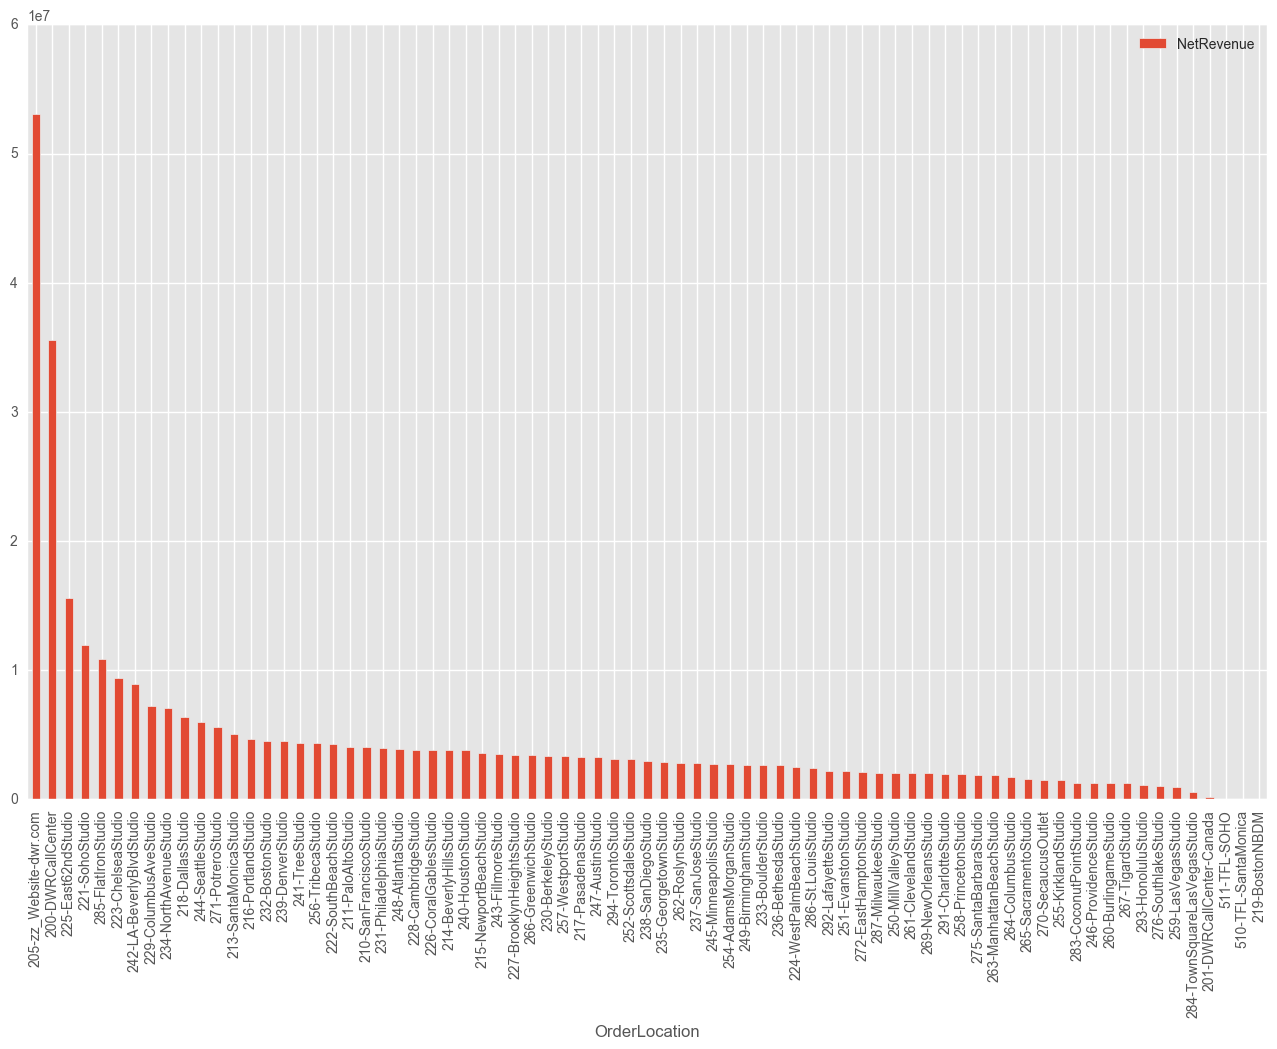

In [7]:
NetRevenue_df = sum_df[ ['NetRevenue'] ].\
    sort_values(by = 'NetRevenue', ascending = False)

NetRevenue_df.plot(kind = 'bar', figsize = (16, 10))

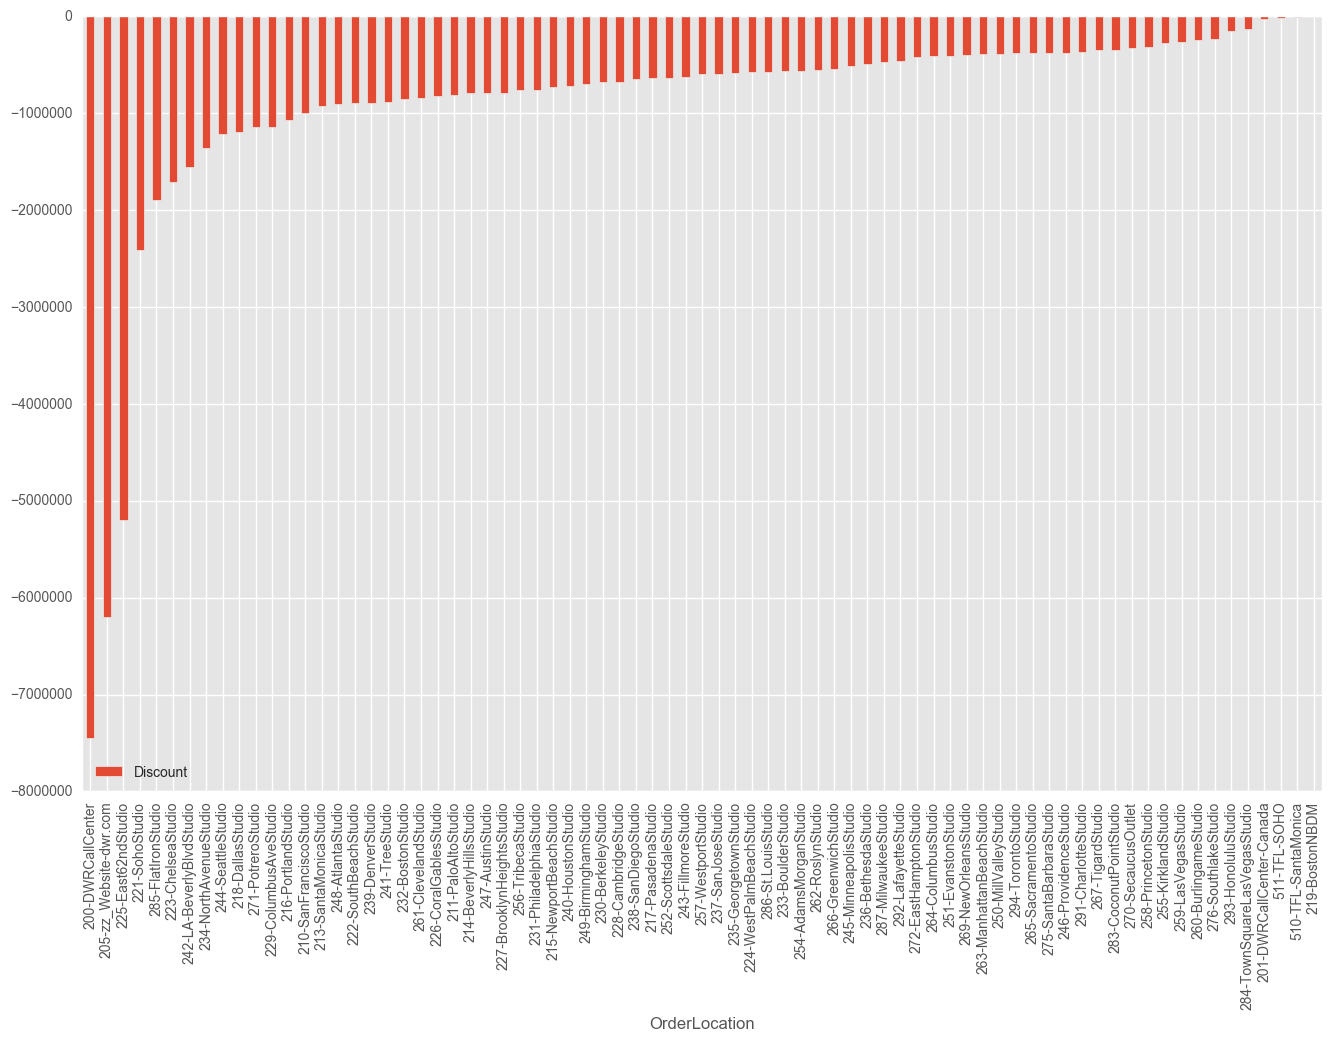

In [8]:
Discount_df = sum_df[ ['Discount'] ].\
    sort_values(by = 'Discount', ascending = True)

Discount_df.plot(kind = 'bar', figsize = (16, 10))

In [9]:
#create dummies for MarketClass
df_MC = pd.get_dummies(df.MarketClass, prefix = 'MarketClass')

In [10]:
#pull dummies into df
df = df.join([df_MC])

In [11]:
#creation of a pivot table df with key columns 
df_1 = df.pivot_table(values=['NetRevenue', 'GrossMarginDollars', 'Full_Path_Sales','MarketClass_Bottom',
'MarketClass_CallCenter', 'MarketClass_Major', 'MarketClass_Middle',
'MarketClass_Top5','MarketClass_Website'],index=['OrderLocation'],columns=['OrderMonth'], aggfunc=np.sum)
df_1.head(n=10)

NetRevenue                                         \
OrderMonth                      Apr07        Apr08        Aug07        Aug08   
OrderLocation                                                                  
200-DWRCallCenter         1599539.155  1366638.373  1543970.114  1068434.294   
201-DWRCallCenter-Canada          NaN    13238.203          NaN    10192.008   
205-zz_Website-dwr.com    2305411.655  2071020.899  2344075.600  1501252.789   
210-SanFranciscoStudio     166683.298   146880.718   167346.238   134015.680   
211-PaloAltoStudio         138111.760   159178.097   205630.141   119312.278   
213-SantaMonicaStudio      180351.042   228994.198   287190.466   179994.332   
214-BeverlyHillsStudio     163853.786   130447.554   193917.121    95805.358   
215-NewportBeachStudio     229595.180   143650.816   135963.946   110424.578   
216-PortlandStudio         156637.343   176018.749   175416.596   152618.188   
217-PasadenaStudio         147386.583    94075.479   152368.202    86422.544   

                                        ...   MarketClass_Website          \
OrderMonth                      Dec07   ...                 Nov08   Oct07   
OrderLocation                           ...                                 
200-DWRCallCenter         1989931.210   ...                   0.0     0.0   
201-DWRCallCenter-Canada          NaN   ...                   0.0     NaN   
205-zz_Website-dwr.com    2610875.347   ...                4639.0  5167.0   
210-SanFranciscoStudio     188243.040   ...                   0.0     0.0   
211-PaloAltoStudio         175720.410   ...                   0.0     0.0   
213-SantaMonicaStudio      235074.426   ...                   0.0     0.0   
214-BeverlyHillsStudio     186780.042   ...                   0.0     0.0   
215-NewportBeachStudio     200611.452   ...                   0.0     0.0   
216-PortlandStudio         301585.939   ...                   0.0     0.0   
217-PasadenaStudio         152996.921   ...                   0.0     0.0   

                                                  
OrderMonth                 Oct08   Sep07   Sep08  
OrderLocation                                     
200-DWRCallCenter            0.0     0.0     0.0  
201-DWRCallCenter-Canada     0.0     NaN     0.0  
205-zz_Website-dwr.com    5026.0  5572.0  5149.0  
210-SanFranciscoStudio       0.0     0.0     0.0  
211-PaloAltoStudio           0.0     0.0     0.0  
213-SantaMonicaStudio        0.0     0.0     0.0  
214-BeverlyHillsStudio       0.0     0.0     0.0  
215-NewportBeachStudio       0.0     0.0     0.0  
216-PortlandStudio           0.0     0.0     0.0  
217-PasadenaStudio           0.0     0.0     0.0  

[10 rows x 216 columns]

Creation of binary codes for MarketClass...


In [12]:
df_1['MarketClass_Top5'] =df_1.MarketClass_Top5.apply(lambda MarketClass_Top5: (MarketClass_Top5 > 0) * 1.)

In [13]:
df_1['MarketClass_Major'] =df_1.MarketClass_Major.apply(lambda MarketClass_Major: (MarketClass_Major > 0) * 1.)

In [14]:
df_1['MarketClass_Middle'] =df_1.MarketClass_Middle.apply(lambda MarketClass_Middle: (MarketClass_Middle > 0) * 1.)

In [15]:
df_1['MarketClass_Bottom'] =df_1.MarketClass_Bottom.apply(lambda MarketClass_Bottom: (MarketClass_Bottom > 0) * 1.)

In [16]:
df_1['MarketClass_Website'] =df_1.MarketClass_Website.apply(lambda MarketClass_Website: (MarketClass_Website > 0) * 1.)

In [17]:
df_1['MarketClass_CallCenter'] =df_1.MarketClass_CallCenter.apply(lambda MarketClass_CallCenter: (MarketClass_CallCenter > 0) * 1.)

In [18]:
#flattens colmns with - Time Period & Data 
df_1.columns = ['_'.join(col).strip() for col in df_1.columns.values]

In [19]:
# comp% calc and relative performance to fleet (1 = better than fleet, 0 = worse or equal)
df_1['CompJan'] = df_1.NetRevenue_Jan08 / df_1.NetRevenue_Jan07 - 1
TCJan = df_1.NetRevenue_Jan08.sum() / df_1.NetRevenue_Jan07.sum() -1
df_1['CompJan2'] = df_1.CompJan.apply(lambda CompJan: (CompJan > TCJan) * 1.)

#Feb
df_1['CompFeb'] = df_1.NetRevenue_Feb08 / df_1.NetRevenue_Feb07 - 1
TCFeb = df_1.NetRevenue_Feb08.sum() / df_1.NetRevenue_Feb07.sum() -1
df_1['CompFeb2'] = df_1.CompFeb.apply(lambda CompFeb: (CompFeb > TCFeb) * 1.)

#Mar
df_1['CompMar'] = df_1.NetRevenue_Mar08 / df_1.NetRevenue_Mar07 - 1
TCMar = df_1.NetRevenue_Mar08.sum() / df_1.NetRevenue_Mar07.sum() -1
df_1['CompMar2'] = df_1.CompMar.apply(lambda CompMar: (CompMar > TCMar) * 1.)

#Apr
df_1['CompApr'] = df_1.NetRevenue_Apr08 / df_1.NetRevenue_Apr07 - 1
TCApr = df_1.NetRevenue_Apr08.sum() / df_1.NetRevenue_Apr07.sum() -1
df_1['CompApr2'] = df_1.CompApr.apply(lambda CompApr: (CompApr > TCApr) * 1.)

#May
df_1['CompMay'] = df_1.NetRevenue_May08 / df_1.NetRevenue_May07 - 1
TCMay = df_1.NetRevenue_May08.sum() / df_1.NetRevenue_May07.sum() -1
df_1['CompMay2'] = df_1.CompMay.apply(lambda CompMay: (CompMay > TCMay) * 1.)

#June
df_1['CompJun'] = df_1.NetRevenue_Jun08 / df_1.NetRevenue_Jun07 - 1
TCJun = df_1.NetRevenue_Jun08.sum() / df_1.NetRevenue_Jun07.sum() -1
df_1['CompJun2'] = df_1.CompJun.apply(lambda CompJun: (CompJun > TCJun) * 1.)

#Jul
df_1['CompJul'] = df_1.NetRevenue_Jul08 / df_1.NetRevenue_Jul07 - 1
TCJul = df_1.NetRevenue_Jul08.sum() / df_1.NetRevenue_Jul07.sum() -1
df_1['CompJul2'] = df_1.CompJul.apply(lambda CompJul: (CompJul > TCJul) * 1.)

#Aug
df_1['CompAug'] = df_1.NetRevenue_Aug08 / df_1.NetRevenue_Aug07 - 1
TCAug = df_1.NetRevenue_Aug08.sum() / df_1.NetRevenue_Aug07.sum() -1
df_1['CompAug2'] = df_1.CompAug.apply(lambda CompAug: (CompAug > TCAug) * 1.)

#Sep
df_1['CompSep'] = df_1.NetRevenue_Sep08 / df_1.NetRevenue_Sep07 - 1
TCSep = df_1.NetRevenue_Sep08.sum() / df_1.NetRevenue_Sep07.sum() -1
df_1['CompSep2'] = df_1.CompSep.apply(lambda CompSep: (CompSep > TCSep) * 1.)

#Oct
df_1['CompOct'] = df_1.NetRevenue_Oct08 / df_1.NetRevenue_Oct07 - 1
TCOct = df_1.NetRevenue_Oct08.sum() / df_1.NetRevenue_Oct07.sum() -1
df_1['CompOct2'] = df_1.CompOct.apply(lambda CompOct: (CompOct > TCOct) * 1.)

#Nov (partial month)
df_1['CompNov'] = df_1.NetRevenue_Nov08 / df_1.NetRevenue_Nov07 - 1
TCNov = df_1.NetRevenue_Nov08.sum() / df_1.NetRevenue_Nov07.sum() -1
df_1['CompNov2'] = df_1.CompNov.apply(lambda CompNov: (CompNov > TCNov) * 1.)

#YTD Comp through Oct
df_1['NetRevYTD08'] = df_1.NetRevenue_Oct08 + df_1.NetRevenue_Sep08 + df_1.NetRevenue_Aug08 +  df_1.NetRevenue_Jul08 + df_1.NetRevenue_Jun08 + df_1.NetRevenue_May08 + df_1.NetRevenue_Apr08 + df_1.NetRevenue_Mar08 + df_1.NetRevenue_Feb08 + df_1.NetRevenue_Jan08
df_1['NetRevYTD07'] = df_1.NetRevenue_Oct07 + df_1.NetRevenue_Sep07 + df_1.NetRevenue_Aug07 +  df_1.NetRevenue_Jul07 + df_1.NetRevenue_Jun07 + df_1.NetRevenue_May07 + df_1.NetRevenue_Apr07 + df_1.NetRevenue_Mar07 + df_1.NetRevenue_Feb07 + df_1.NetRevenue_Jan07
df_1['CompYTD'] = df_1.NetRevYTD08 / df_1.NetRevYTD07 - 1
TCYTD = df_1.NetRevYTD08.sum() / df_1.NetRevYTD07.sum() -1
df_1['CompYTD2'] = df_1.CompYTD.apply(lambda CompYTD: (CompYTD > TCYTD) * 1.)


In [20]:
df_1.CompYTD2

OrderLocation
200-DWRCallCenter               0.0
201-DWRCallCenter-Canada        0.0
205-zz_Website-dwr.com          0.0
210-SanFranciscoStudio          1.0
211-PaloAltoStudio              1.0
213-SantaMonicaStudio           1.0
214-BeverlyHillsStudio          0.0
215-NewportBeachStudio          1.0
216-PortlandStudio              1.0
217-PasadenaStudio              0.0
                               ... 
284-TownSquareLasVegasStudio    0.0
285-FlatIronStudio              1.0
286-St.LouisStudio              0.0
287-MilwaukeeStudio             0.0
291-CharlotteStudio             0.0
292-LafayetteStudio             0.0
293-HonoluluStudio              0.0
294-TorontoStudio               0.0
510-TFL-SantaMonica             0.0
511-TFL-SOHO                    0.0
Name: CompYTD2, dtype: float64

In [21]:
#Creates column for discount rate and then compares that rate to the fleet to produce a 1 or 0 which represents better or worse than the overall
df_1['DRJan08'] = 1- df_1.NetRevenue_Jan08 / df_1.Full_Path_Sales_Jan08 
TDRJan = 1- df_1.NetRevenue_Jan08.sum() / df_1.Full_Path_Sales_Jan08.sum()
df_1['TDRJan2'] = df_1.DRJan08.apply(lambda DRJan08: (DRJan08 < TDRJan) * 1.)

#Feb
df_1['DRFeb08'] = 1- df_1.NetRevenue_Feb08 / df_1.Full_Path_Sales_Feb08 
TDRFeb = 1- df_1.NetRevenue_Feb08.sum() / df_1.Full_Path_Sales_Feb08.sum()
df_1['TDRFeb2'] = df_1.DRFeb08.apply(lambda DRFeb08: (DRFeb08 < TDRFeb) * 1.)

#Mar
df_1['DRMar08'] = 1- df_1.NetRevenue_Mar08 / df_1.Full_Path_Sales_Mar08 
TDRMar = 1- df_1.NetRevenue_Mar08.sum() / df_1.Full_Path_Sales_Mar08.sum()
df_1['TDRMar2'] = df_1.DRMar08.apply(lambda DRMar08: (DRMar08 < TDRMar) * 1.)

#Apr
df_1['DRApr08'] = 1- df_1.NetRevenue_Apr08 / df_1.Full_Path_Sales_Apr08 
TDRApr = 1- df_1.NetRevenue_Apr08.sum() / df_1.Full_Path_Sales_Apr08.sum()
df_1['TDRApr2'] = df_1.DRApr08.apply(lambda DRApr08: (DRApr08 < TDRApr) * 1.)

#May
df_1['DRMay08'] = 1- df_1.NetRevenue_May08 / df_1.Full_Path_Sales_May08 
TDRMay = 1- df_1.NetRevenue_May08.sum() / df_1.Full_Path_Sales_May08.sum()
df_1['TDRMay2'] = df_1.DRMay08.apply(lambda DRMay08: (DRMay08 < TDRMay) * 1.)

#June
df_1['DRJun08'] = 1- df_1.NetRevenue_Jun08 / df_1.Full_Path_Sales_Jun08 
TDRJun = 1- df_1.NetRevenue_Jun08.sum() / df_1.Full_Path_Sales_Jun08.sum()
df_1['TDRJun2'] = df_1.DRJun08.apply(lambda DRJun08: (DRJun08 < TDRJun) * 1.)

#Jul
df_1['DRJul08'] = 1- df_1.NetRevenue_Jul08 / df_1.Full_Path_Sales_Jul08 
TDRJul = 1- df_1.NetRevenue_Jul08.sum() / df_1.Full_Path_Sales_Jul08.sum()
df_1['TDRJul2'] = df_1.DRJul08.apply(lambda DRJul08: (DRJul08 < TDRJul) * 1.)

#Aug
df_1['DRAug08'] = 1- df_1.NetRevenue_Aug08 / df_1.Full_Path_Sales_Aug08 
TDRAug = 1- df_1.NetRevenue_Aug08.sum() / df_1.Full_Path_Sales_Aug08.sum()
df_1['TDRAug2'] = df_1.DRAug08.apply(lambda DRAug08: (DRAug08 < TDRAug) * 1.)

#Sep
df_1['DRSep08'] = 1- df_1.NetRevenue_Sep08 / df_1.Full_Path_Sales_Sep08 
TDRSep = 1- df_1.NetRevenue_Sep08.sum() / df_1.Full_Path_Sales_Sep08.sum()
df_1['TDRSep2'] = df_1.DRSep08.apply(lambda DRSep08: (DRSep08 < TDRSep) * 1.)

#Oct
df_1['DROct08'] = 1- df_1.NetRevenue_Oct08 / df_1.Full_Path_Sales_Oct08 
TDROct = 1- df_1.NetRevenue_Oct08.sum() / df_1.Full_Path_Sales_Oct08.sum()
df_1['TDROct2'] = df_1.DROct08.apply(lambda DROct08: (DROct08 < TDROct) * 1.)

#Nov
df_1['DRNov08'] = 1- df_1.NetRevenue_Nov08 / df_1.Full_Path_Sales_Nov08 
TDRNov = 1- df_1.NetRevenue_Nov08.sum() / df_1.Full_Path_Sales_Nov08.sum()
df_1['TDRNov2'] = df_1.DRNov08.apply(lambda DRNov08: (DRNov08 < TDRNov) * 1.)


#YTD DR through Oct
#df_1['NetRevYTD08'] = df_1.NetRevenue_Oct08 + df_1.NetRevenue_Sep08 + df_1.NetRevenue_Aug08 +  df_1.NetRevenue_Jul08 + df_1.NetRevenue_Jun08 + df_1.NetRevenue_May08 + df_1.NetRevenue_Apr08 + df_1.NetRevenue_Mar08 + df_1.NetRevenue_Feb08 + df_1.NetRevenue_Jan08
df_1['FullPathYTD08'] = df_1.Full_Path_Sales_Oct08 + df_1.Full_Path_Sales_Sep08 + df_1.Full_Path_Sales_Aug08 +  df_1.Full_Path_Sales_Jul08 + df_1.Full_Path_Sales_Jun08 + df_1.Full_Path_Sales_May08 + df_1.Full_Path_Sales_Apr08 + df_1.Full_Path_Sales_Mar08 + df_1.Full_Path_Sales_Feb08 + df_1.Full_Path_Sales_Jan08

df_1['DRYTD'] = 1- df_1.NetRevYTD08 / df_1.FullPathYTD08 
TDRYTD = 1- df_1.NetRevYTD08.sum() / df_1.FullPathYTD08.sum()
df_1['TDRYTD2'] = df_1.DRYTD.apply(lambda DRYTD: (DRYTD < TDRYTD) * 1.)




In [22]:
#Creates a column to calculate the discount rate and then compares that to the rest of the fleet. A 1 is better 0 is worse
df_1['GMJan08'] = df_1.GrossMarginDollars_Jan08 / df_1.NetRevenue_Jan08 
TGMJan = df_1.GrossMarginDollars_Jan08.sum() / df_1.NetRevenue_Jan08.sum()
df_1['TGMJan2'] = df_1.GMJan08.apply(lambda GMJan08: (GMJan08 > TGMJan) * 1.)

#Feb
df_1['GMFeb08'] = df_1.GrossMarginDollars_Feb08 / df_1.NetRevenue_Feb08 
TGMFeb = df_1.GrossMarginDollars_Feb08.sum() / df_1.NetRevenue_Feb08.sum()
df_1['TGMFeb2'] = df_1.GMFeb08.apply(lambda GMFeb08: (GMFeb08 > TGMFeb) * 1.)

#Mar
df_1['GMMar08'] = df_1.GrossMarginDollars_Mar08 / df_1.NetRevenue_Mar08 
TGMMar = df_1.GrossMarginDollars_Mar08.sum() / df_1.NetRevenue_Mar08.sum()
df_1['TGMMar2'] = df_1.GMMar08.apply(lambda GMMar08: (GMMar08 > TGMMar) * 1.)

#Apr
df_1['GMApr08'] = df_1.GrossMarginDollars_Apr08 / df_1.NetRevenue_Apr08 
TGMApr = df_1.GrossMarginDollars_Apr08.sum() / df_1.NetRevenue_Apr08.sum()
df_1['TGMApr2'] = df_1.GMApr08.apply(lambda GMApr08: (GMApr08 > TGMApr) * 1.)

#May
df_1['GMMay08'] = df_1.GrossMarginDollars_May08 / df_1.NetRevenue_May08 
TGMMay = df_1.GrossMarginDollars_May08.sum() / df_1.NetRevenue_May08.sum()
df_1['TGMMay2'] = df_1.GMMay08.apply(lambda GMMay08: (GMMay08 > TGMMay) * 1.)

#June
df_1['GMJun08'] = df_1.GrossMarginDollars_Jun08 / df_1.NetRevenue_Jun08 
TGMJun = df_1.GrossMarginDollars_Jun08.sum() / df_1.NetRevenue_Jun08.sum()
df_1['TGMJun2'] = df_1.GMJun08.apply(lambda GMJun08: (GMJun08 > TGMJun) * 1.)

#Jul
df_1['GMJul08'] = df_1.GrossMarginDollars_Jul08 / df_1.NetRevenue_Jul08 
TGMJul = df_1.GrossMarginDollars_Jul08.sum() / df_1.NetRevenue_Jul08.sum()
df_1['TGMJul2'] = df_1.GMJul08.apply(lambda GMJul08: (GMJul08 > TGMJul) * 1.)

#Aug
df_1['GMAug08'] = df_1.GrossMarginDollars_Aug08 / df_1.NetRevenue_Aug08 
TGMAug = df_1.GrossMarginDollars_Aug08.sum() / df_1.NetRevenue_Aug08.sum()
df_1['TGMAug2'] = df_1.GMAug08.apply(lambda GMAug08: (GMAug08 > TGMAug) * 1.)

#Sep
df_1['GMSep08'] = df_1.GrossMarginDollars_Sep08 / df_1.NetRevenue_Sep08 
TGMSep = df_1.GrossMarginDollars_Sep08.sum() / df_1.NetRevenue_Sep08.sum()
df_1['TGMSep2'] = df_1.GMSep08.apply(lambda GMSep08: (GMSep08 > TGMSep) * 1.)

#Oct
df_1['GMOct08'] = df_1.GrossMarginDollars_Oct08 / df_1.NetRevenue_Oct08 
TGMOct = df_1.GrossMarginDollars_Oct08.sum() / df_1.NetRevenue_Oct08.sum()
df_1['TGMOct2'] = df_1.GMOct08.apply(lambda GMOct08: (GMOct08 > TGMOct) * 1.)

#Nov
df_1['GMNov08'] = df_1.GrossMarginDollars_Nov08 / df_1.NetRevenue_Nov08 
TGMNov = df_1.GrossMarginDollars_Nov08.sum() / df_1.NetRevenue_Nov08.sum()
df_1['TGMNov2'] = df_1.GMNov08.apply(lambda GMNov08: (GMNov08 > TGMNov) * 1.)

#YTD DR through Oct
#df_1['NetRevYTD08'] = df_1.NetRevenue_Oct08 + df_1.NetRevenue_Sep08 + df_1.NetRevenue_Aug08 +  df_1.NetRevenue_Jul08 + df_1.NetRevenue_Jun08 + df_1.NetRevenue_May08 + df_1.NetRevenue_Apr08 + df_1.NetRevenue_Mar08 + df_1.NetRevenue_Feb08 + df_1.NetRevenue_Jan08
df_1['GMYTD08'] = df_1.GrossMarginDollars_Oct08 + df_1.GrossMarginDollars_Sep08 + df_1.GrossMarginDollars_Aug08 +  df_1.GrossMarginDollars_Jul08 + df_1.GrossMarginDollars_Jun08 + df_1.GrossMarginDollars_May08 + df_1.GrossMarginDollars_Apr08 + df_1.GrossMarginDollars_Mar08 + df_1.GrossMarginDollars_Feb08 + df_1.GrossMarginDollars_Jan08

df_1['GMperYTD08'] = df_1.GMYTD08 / df_1.NetRevYTD08 
TGMYTD = df_1.GMYTD08.sum() / df_1.NetRevYTD08.sum()
df_1['TGMYTD2'] = df_1.GMperYTD08.apply(lambda GMperYTD08: (GMperYTD08 > TGMYTD) * 1.)


In [23]:
df_1.isnull().sum().sum()

550

In [24]:
#drop rows with at least one na
df_1 = df_1.dropna()

In [25]:
df_1.isnull().sum().sum()

0

In [26]:
#df_1[ ['CompYTD','GMperYTD08','DRYTD','MarketClass_Major_Oct08', 'MarketClass_Top5_Oct08']].corr

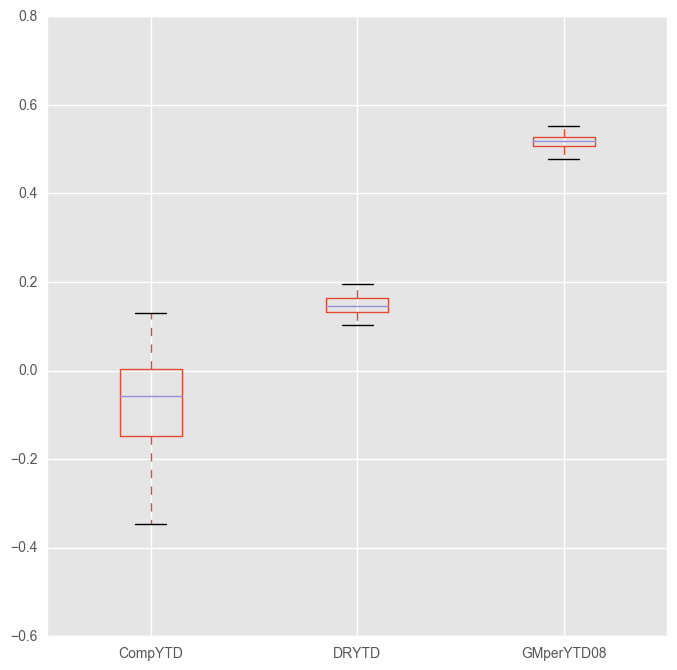

In [27]:
df_1[ ['CompYTD','DRYTD', 'GMperYTD08'] ].plot(kind = 'box', figsize = (8, 8))

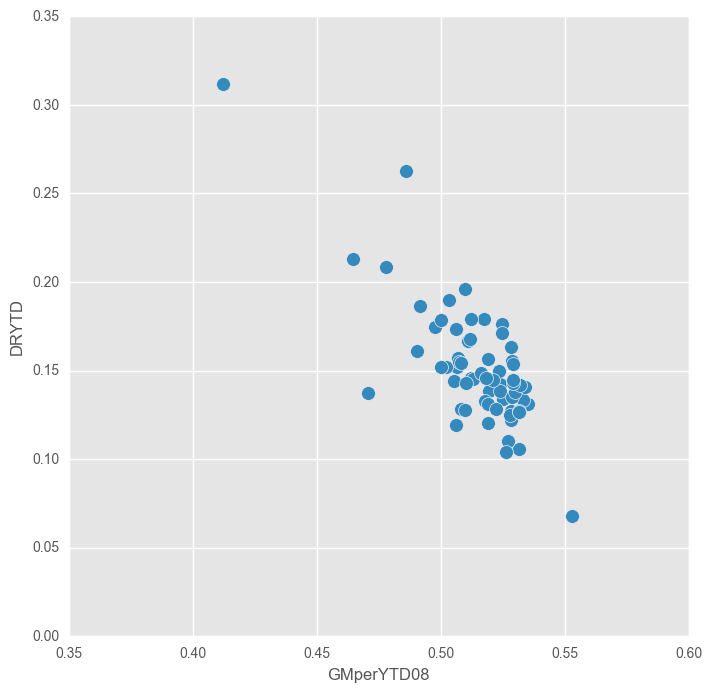

In [28]:
df_1.plot(kind = 'scatter', x = 'GMperYTD08', y = 'DRYTD',s = 100, figsize = (8, 8))

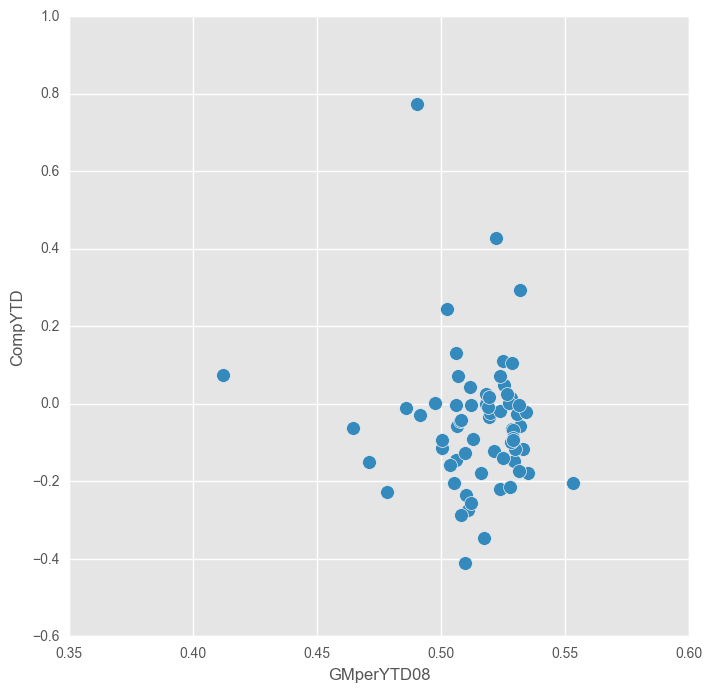

In [29]:
df_1.plot(kind = 'scatter', x = 'GMperYTD08', y = 'CompYTD',s = 100, figsize = (8, 8))

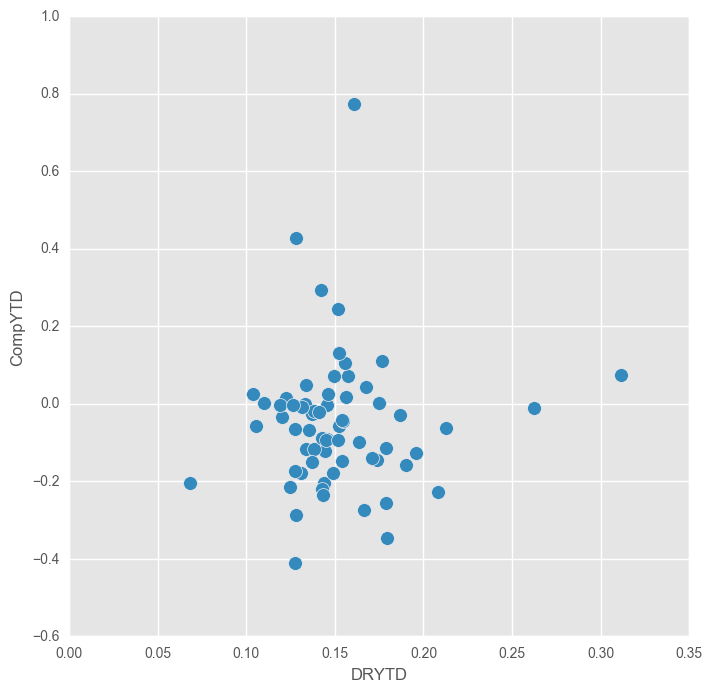

In [30]:
df_1.plot(kind = 'scatter', x = 'DRYTD', y = 'CompYTD',s = 100, figsize = (8, 8))

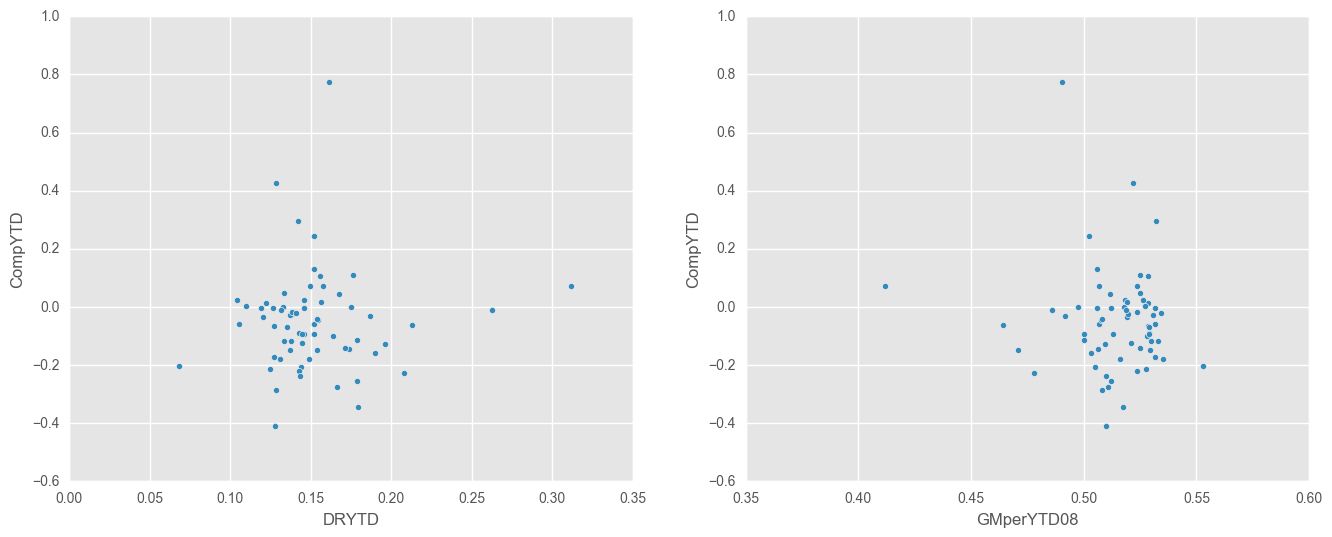

In [31]:
X = df_1
_, axes = plt.subplots(1, 2, figsize = (16, 6))

X.plot(kind = 'scatter', x = 'DRYTD', y = 'CompYTD', ax = axes[0])
X.plot(kind = 'scatter', x = 'GMperYTD08', y = 'CompYTD', ax = axes[1])



In [32]:
corr = df_1.corr()

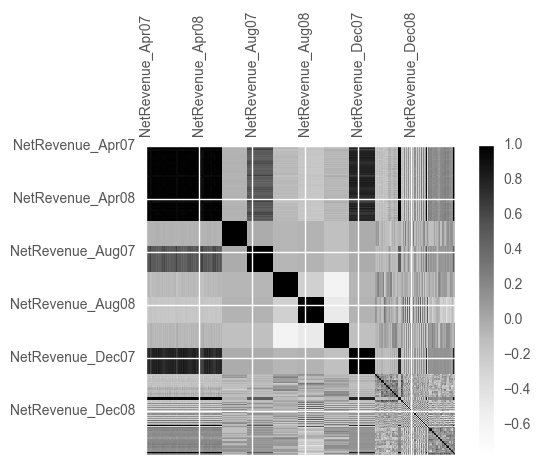

In [33]:
figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1)
figure.colorbar(subplot.matshow(corr))
subplot.set_xticklabels([None] + list(corr.columns), rotation = 90)
subplot.set_yticklabels([None] + list(corr.columns))

# Logisitic Regression

In [34]:
#GMOct08 - Gross Margin % for month of October 
#TGMJun2 - binary if GM is better than fleet for month of June (1 is better)
#DROct08 - Discount Rate % for month of October
#TDRJun2 - binary if DR is better than fleet for month of June (1 is better)
#CompYTD2 - binary whether comp% is better than the fleet for YTD
#CompYTD - %Comp rate YTD

In [35]:
# capturing the feature or dependant variables
#X = df_1[ ['TGMJun2', 'TDRJun2', 'TGMJul2', 'TDRJul2','TGMYTD2','TDRYTD2'] ]
X = df_1[ ['MarketClass_Major_Oct08', 'MarketClass_Top5_Oct08', 'MarketClass_Middle_Oct08', 'MarketClass_Bottom_Oct08','CompJan2','CompFeb2', 'CompMar2', 'CompApr2', 'CompMay2', 'CompJun2', 'CompJul2', 'CompAug2','CompSep2','CompOct2','TDRJan2','TDRFeb2','TDRMar2','TDRApr2','TDRMay2','TDRJun2','TDRJul2','TDRAug2','TDRSep2','TDROct2','TDRYTD2','TGMJan2','TGMFeb2','TGMMar2','TGMApr2','TGMMay2','TGMJun2','TGMJul2','TGMAug2','TGMSep2','TGMOct2','TGMYTD2'] ]

In [36]:
df_1.TDRJun2

OrderLocation
200-DWRCallCenter         1.0
205-zz_Website-dwr.com    1.0
210-SanFranciscoStudio    0.0
211-PaloAltoStudio        0.0
213-SantaMonicaStudio     1.0
214-BeverlyHillsStudio    0.0
215-NewportBeachStudio    1.0
216-PortlandStudio        1.0
217-PasadenaStudio        1.0
218-DallasStudio          1.0
                         ... 
270-SecaucusOutlet        0.0
271-PotreroStudio         1.0
272-EastHamptonStudio     0.0
275-SantaBarbaraStudio    1.0
276-SouthlakeStudio       1.0
283-CoconutPointStudio    1.0
285-FlatIronStudio        1.0
286-St.LouisStudio        0.0
287-MilwaukeeStudio       0.0
292-LafayetteStudio       1.0
Name: TDRJun2, dtype: float64

In [37]:
X

,MarketClass_Major_Oct08,MarketClass_Top5_Oct08,MarketClass_Middle_Oct08,MarketClass_Bottom_Oct08,CompJan2,...,TGMJul2,TGMAug2,TGMSep2,TGMOct2,TGMYTD2
OrderLocation,,,,,,,,,,,
200-DWRCallCenter,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0
205-zz_Website-dwr.com,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0
210-SanFranciscoStudio,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0
211-PaloAltoStudio,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0
213-SantaMonicaStudio,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0
214-BeverlyHillsStudio,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0
215-NewportBeachStudio,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0
216-PortlandStudio,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0
217-PasadenaStudio,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0


In [38]:
# response / dependent variable  - what we are trying to predict
c = df_1.CompYTD2

In [39]:
c

OrderLocation
200-DWRCallCenter         0.0
205-zz_Website-dwr.com    0.0
210-SanFranciscoStudio    1.0
211-PaloAltoStudio        1.0
213-SantaMonicaStudio     1.0
214-BeverlyHillsStudio    0.0
215-NewportBeachStudio    1.0
216-PortlandStudio        1.0
217-PasadenaStudio        0.0
218-DallasStudio          1.0
                         ... 
270-SecaucusOutlet        1.0
271-PotreroStudio         1.0
272-EastHamptonStudio     1.0
275-SantaBarbaraStudio    0.0
276-SouthlakeStudio       1.0
283-CoconutPointStudio    1.0
285-FlatIronStudio        1.0
286-St.LouisStudio        0.0
287-MilwaukeeStudio       0.0
292-LafayetteStudio       0.0
Name: CompYTD2, dtype: float64

In [40]:
#turns 1 and 0 to comp and non comp
cs = pd.get_dummies(c, prefix = None)

In [41]:
cs.columns = ['NonComp', 'Comp']

cs['NonComp']

OrderLocation
200-DWRCallCenter         1.0
205-zz_Website-dwr.com    1.0
210-SanFranciscoStudio    0.0
211-PaloAltoStudio        0.0
213-SantaMonicaStudio     0.0
214-BeverlyHillsStudio    1.0
215-NewportBeachStudio    0.0
216-PortlandStudio        0.0
217-PasadenaStudio        1.0
218-DallasStudio          0.0
                         ... 
270-SecaucusOutlet        0.0
271-PotreroStudio         0.0
272-EastHamptonStudio     0.0
275-SantaBarbaraStudio    1.0
276-SouthlakeStudio       0.0
283-CoconutPointStudio    0.0
285-FlatIronStudio        0.0
286-St.LouisStudio        1.0
287-MilwaukeeStudio       1.0
292-LafayetteStudio       1.0
Name: NonComp, dtype: float64

In [42]:
X.columns

Index([u'MarketClass_Major_Oct08', u'MarketClass_Top5_Oct08',
       u'MarketClass_Middle_Oct08', u'MarketClass_Bottom_Oct08', u'CompJan2',
       u'CompFeb2', u'CompMar2', u'CompApr2', u'CompMay2', u'CompJun2',
       u'CompJul2', u'CompAug2', u'CompSep2', u'CompOct2', u'TDRJan2',
       u'TDRFeb2', u'TDRMar2', u'TDRApr2', u'TDRMay2', u'TDRJun2', u'TDRJul2',
       u'TDRAug2', u'TDRSep2', u'TDROct2', u'TDRYTD2', u'TGMJan2', u'TGMFeb2',
       u'TGMMar2', u'TGMApr2', u'TGMMay2', u'TGMJun2', u'TGMJul2', u'TGMAug2',
       u'TGMSep2', u'TGMOct2', u'TGMYTD2'],
      dtype='object')

In [43]:
#Pick up line 8 in codealong 11
model_Comp = linear_model.LogisticRegression().\
    fit(X, cs.Comp)
    
print model_Comp.coef_
print model_Comp.intercept_

[[-0.70391879 -0.49344089 -0.06969734 -0.20551778  0.40761565  0.84335857
   0.50983919  1.1243852   0.55500355  1.00406152  0.2385192   0.53283291
   0.90939202  0.47218498  0.49591183  0.3874655  -0.29812203  0.12207789
  -0.3746649  -0.00660654  0.29447995 -0.14953322 -0.22653464  0.02983901
   0.47280039 -0.55883296 -0.4080224   0.19626279 -0.7139077  -0.59458464
   0.01941007  0.44669931  0.68471239 -0.67409806  0.30987311  0.03560634]]
[-1.73915312]


In [44]:
#The higher the value to the corresponding variable, the greater the effect on the response / dependent variable (regressed) Comp% 
#Closer to 1 means that there is less of an effect... 
#Factor for odds -- Odds Ratio... 
np.exp(model_Comp.coef_)

array([[ 0.4946431 ,  0.61052204,  0.93267606,  0.81422562,  1.50322928,
         2.32415973,  1.66502342,  3.07832372,  1.74194716,  2.72934463,
         1.26936808,  1.70375205,  2.48281259,  1.60349397,  1.64199477,
         1.47324213,  0.74221076,  1.1298421 ,  0.68751963,  0.99341524,
         1.34242805,  0.86110983,  0.79729172,  1.03028865,  1.60448107,
         0.57187608,  0.66496399,  1.21684664,  0.48972675,  0.55179171,
         1.01959967,  1.5631442 ,  1.98320136,  0.50961586,  1.36325211,
         1.03624784]])

In [45]:
logit_hat_Comp = model_Comp.intercept_ + \
    (X * model_Comp.coef_[0]).sum(axis = 1)

In [46]:
odds_hat_Comp = np.exp(logit_hat_Comp)

In [47]:
p_hat_Comp = odds_hat_Comp / (1 + odds_hat_Comp)

In [48]:
c_hat_Comp = p_hat_Comp.round()

In [49]:
pd.crosstab(c_hat_Comp,
    cs.Comp,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,0.0,1.0
Hypothesized Class,,
0.0,25,0
1.0,2,39
